In [51]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam  
from keras.utils.np_utils import to_categorical
from keras.backend import categorical_crossentropy

In [ ]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std = 0.4)
print(X)
print(y)

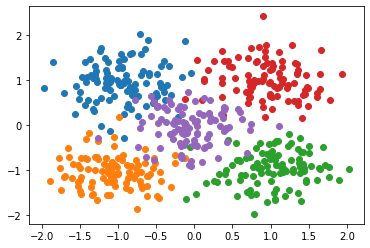

In [53]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [54]:
print(y)
y_cat = to_categorical(y, 5)
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [55]:

model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
model.fit(x=X, y=y_cat, verbose=1, batch_size = 50, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1801 - accuracy: 0.5360
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.8380
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.9340
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.9440
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2810 - accuracy: 0.9360
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.9420
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.9480
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9420
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9480
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9520
Epoch 11/

In [57]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 50)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    print(xx_)
    print(yy_)
    grid = np.c_[xx_, yy_]
    pred_func = np.argmax(model.predict(grid), axis=-1)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

[-2.9706717  -2.84833268 -2.72599367 ...  2.77926206  2.90160108
  3.02394009]
[-2.97723031 -2.97723031 -2.97723031 ...  3.42863169  3.42863169
  3.42863169]


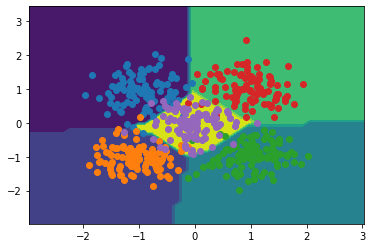

In [58]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])



[-2.9706717  -2.84833268 -2.72599367 ...  2.77926206  2.90160108
  3.02394009]
[-2.97723031 -2.97723031 -2.97723031 ...  3.42863169  3.42863169
  3.42863169]
Prediction is [2]


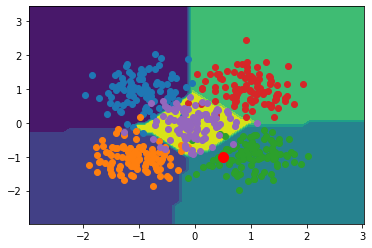

In [59]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x = 0.5
y = -1
point = np.array([[x, y]])
prediction = np.argmax(model.predict(point), axis=1)
plt.plot([x], [y], marker='o', markersize=10, color = "r")
print("Prediction is",prediction )